# MACHINE LEARNING AN END TO END SOLUTION: Section 3

# Loan Application

Presented by Shaun

Throughout the financial sector, machine learning algorithms are being developed to approve loan applications. In this project,we will process a dataset and use techniques to construct three machine learning models to predict on loan approvals. A dataset with 1102 observations will be examined, cleaned and organised; a data exploration will identify the features and their data types and the most important features, which are the best predictors for loan approvals. 

## Synthetic Minority Over-sampling Technique (SMOTE)

As we have seen so far, out of the box machine learning algorithms do not necessarily offer the best accuracy or performance, by performing hyperparameter tuning we can gain, improved accuracy and performance scores on the machine learning models. We use Synthetic Minority Over-sampling Technique (SMOTE) to balance out class labels, this finds minority class observations and creates similar, but randomly modified, new minority class observations. 

**SMOTE:** More details here:  __[SMOTE](https://pypi.org/project/imbalanced-learn/)__ 

**Note:**  *If you get this type of error:* **ImportError: No module named imbalanced_learn** <br>
You need to install the **imbalanced_learn** library: If you have installed Anaconda find your **conda.exe** location, open up a command prompt from there and install the imbalanced_learn library as shown here: **conda install -c glemaitre imbalanced-learn**
<img src="img/anaconda.JPG" width="280" height="280" align="left"/> <br><br>

In [16]:
import numpy as np
import pandas as pd


##import classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

##import train test split
from sklearn.model_selection import train_test_split

##import scoring metrics
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn import model_selection
from sklearn.model_selection import cross_val_score  

#import SMOTE
from imblearn.over_sampling import SMOTE


##Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [17]:
predata = pd.read_csv('c:\\ml\\LoanPredOrig.csv')
predata = predata.dropna()
#Categorical data clean up, this will error if you try to run this twice consecutively, without reloading the dataset
predata['Loan_Status'] = predata.Loan_Status.astype(int)
predata['Employed'] = np.where(predata['Employed'].str.contains('YES'), 1, 0)
predata['Marital_Status'] = np.where(predata['Marital_Status'].str.contains('YES'), 1, 0)
predata['Graduate'] = np.where(predata['Graduate'].str.contains('YES'), 1, 0)
predata['Credit_History'] = np.where(predata['Credit_History'].str.contains('YES'), 1, 0)
predata['PropertyOwner'] = np.where(predata['PropertyOwner'].str.contains('YES'), 1, 0)
df = pd.DataFrame(predata)

#Drop the Loanid column
del df['Loanid']

#One hot encding on the Gender column
data = pd.get_dummies(df,columns=['Gender'])
 

In [18]:

from sklearn.model_selection import train_test_split
X_trainsm, X_test, y_trainsm, y_test = train_test_split(data.loc[:, data.columns != 'Loan_Status'], data['Loan_Status'], stratify=data['Loan_Status'], test_size=0.30)

print("Shape of the X_train dataset: ", X_trainsm.shape)
print("Shape of the y_train dataset: ", y_trainsm.shape)

print('--------------------------------------------------------------')
print("Training Dataset, counts of label '1': {}".format(sum(y_trainsm==1)))
print("Training Dataset, counts of label '0': {}".format(sum(y_trainsm==0))) 
  

X_train, x_val_res, y_train, y_val_res = train_test_split(X_trainsm,
                                                    y_trainsm,
                                                    test_size = .1,
                                                    random_state=12)
 
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(X_train, y_train)
print (y_train.value_counts(), np.bincount(y_res))
 
print("Shape of the X_trainres dataset: ", x_res.shape)
print("Shape of the y_trainres dataset: ", y_res.shape)

print('-----------------------------------------------')
print("Training Dataset, counts of y label '1': {}".format(sum(y_res==1)))
print("Training Dataset, counts of y label '0': {}".format(sum(y_res==0))) 
 

Shape of the X_train dataset:  (770, 12)
Shape of the y_train dataset:  (770,)
--------------------------------------------------------------
Training Dataset, counts of label '1': 520
Training Dataset, counts of label '0': 250
1    469
0    224
Name: Loan_Status, dtype: int64 [469 469]
Shape of the X_trainres dataset:  (938, 12)
Shape of the y_trainres dataset:  (938,)
-----------------------------------------------
Training Dataset, counts of y label '1': 469
Training Dataset, counts of y label '0': 469


C:\Users\tulls\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0.7402597402597403
0.7450980392156863
0.7333333333333333
Accuracy of  KNN  classifier on training set: 0.81
Accuracy of  KNN  classifier on validation set: 0.74
Accuracy of  KNN  classifier on test set: 0.73
Precision: 0.839
Recall: 0.749
F1: 0.791


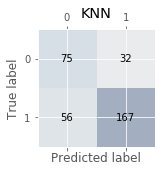

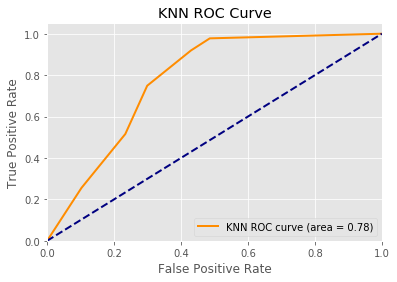

0.987012987012987
1.0
0.9787878787878788
Accuracy of  NB  classifier on training set: 0.98
Accuracy of  NB  classifier on validation set: 0.99
Accuracy of  NB  classifier on test set: 0.98
Precision: 0.974
Recall: 0.996
F1: 0.984


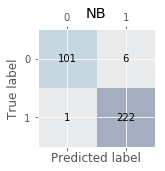

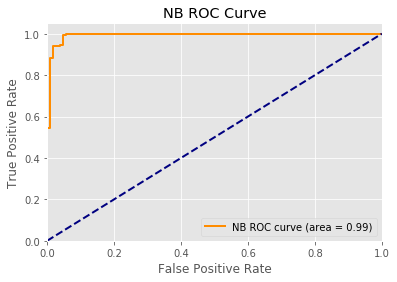

0.8571428571428571
0.9019607843137255
0.7151515151515152
Accuracy of  ANN  classifier on training set: 0.69
Accuracy of  ANN  classifier on validation set: 0.86
Accuracy of  ANN  classifier on test set: 0.72
Precision: 0.856
Recall: 0.695
F1: 0.767


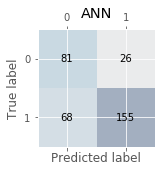

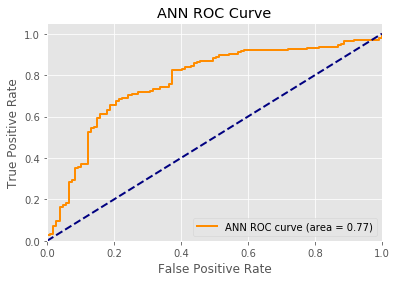

In [20]:
clfs = []
clfs.append(('KNN', KNeighborsClassifier()))
clfs.append(('NB', GaussianNB()))
clfs.append(('ANN', MLPClassifier()))



for name, clf in clfs:
    clf.fit(x_res, y_res)
    print(clf.score(x_val_res, y_val_res))
    print(recall_score(y_val_res, clf.predict(x_val_res)))
    predictions = clf.predict(X_test)
    y_predict_probabilities = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
    roc_auc = auc(fpr, tpr)
    confmat =confusion_matrix(y_true=y_test, y_pred=predictions)
    #print(confmat)
    print (accuracy_score(y_test, predictions))
    print('Accuracy of ', name,  ' classifier on training set: {:.2f}'.format(clf.score(x_res, y_res)))
    print('Accuracy of ', name,  ' classifier on validation set: {:.2f}'.format(clf.score(x_val_res, y_val_res)))
    print('Accuracy of ', name, ' classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=predictions))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=predictions))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=predictions))
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title(name)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    
    plt.figure()
    plt.title(name)
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label=name + ' ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name +' ROC Curve')
    plt.legend(loc="lower right")
    plt.show()





# Section 3 Completed!